In [3]:
import numpy as np
import pandas as pd
#pd based on np
#np advantage: faster on calculating;
#pd advantage: labels, groupby, pivot_table

#build DataFrame: dict of Series, list of dicts, np_array
#build scores(70-100) to store grades of 030201-030230
#index: student number(30), column: subjects(6)
index = [ "0302"+str(i//10)+str(i%10) for i in range(1, 31) ]
columns = ["Chinese", "Math", "English", "Physics", "Chemistry", "Computer"]
scores = pd.DataFrame(np.random.randint(70,100,(30,6)), index=index, columns=columns)
print(scores)


        Chinese  Math  English  Physics  Chemistry  Computer
030201       71    98       85       82         89        71
030202       77    77       75       80         77        89
030203       80    90       87       92         70        78
030204       85    80       87       78         94        74
030205       74    97       88       99         82        86
030206       82    88       73       75         75        70
030207       99    78       85       83         93        74
030208       98    94       76       91         71        83
030209       70    76       76       73         93        92
030210       74    93       71       86         95        81
030211       87    84       88       94         92        92
030212       91    83       76       84         99        86
030213       85    84       93       73         70        71
030214       74    89       80       99         89        87
030215       74    81       78       71         84        74
030216       82    93   

In [5]:
#visit it attributes: values, index, columns, shape, size, dtypes
print(scores.values)
print("index: ", scores.index)
print("columns", scores.columns)
print("shape: {}, size: {}".format(scores.shape, scores.size))
print(scores.dtypes)
#

[[71 98 85 82 89 71]
 [77 77 75 80 77 89]
 [80 90 87 92 70 78]
 [85 80 87 78 94 74]
 [74 97 88 99 82 86]
 [82 88 73 75 75 70]
 [99 78 85 83 93 74]
 [98 94 76 91 71 83]
 [70 76 76 73 93 92]
 [74 93 71 86 95 81]
 [87 84 88 94 92 92]
 [91 83 76 84 99 86]
 [85 84 93 73 70 71]
 [74 89 80 99 89 87]
 [74 81 78 71 84 74]
 [82 93 92 90 99 93]
 [94 96 81 95 98 91]
 [90 85 73 75 88 78]
 [90 77 93 84 83 95]
 [84 88 85 89 97 80]
 [86 76 99 75 94 70]
 [90 74 83 95 79 79]
 [84 94 87 80 75 74]
 [76 73 93 85 98 81]
 [80 83 90 81 81 85]
 [97 71 92 88 81 98]
 [96 71 71 89 79 74]
 [77 96 90 88 91 78]
 [84 94 88 70 71 73]
 [82 91 74 75 96 84]]
index:  Index(['030201', '030202', '030203', '030204', '030205', '030206', '030207',
       '030208', '030209', '030210', '030211', '030212', '030213', '030214',
       '030215', '030216', '030217', '030218', '030219', '030220', '030221',
       '030222', '030223', '030224', '030225', '030226', '030227', '030228',
       '030229', '030230'],
      dtype='object')
col

In [6]:
#get all grades of math
#列索引
print(scores["Math"])
#get all grades of 030205
#行索引
print(scores.loc["030205"])

030201    98
030202    77
030203    90
030204    80
030205    97
030206    88
030207    78
030208    94
030209    76
030210    93
030211    84
030212    83
030213    84
030214    89
030215    81
030216    93
030217    96
030218    85
030219    77
030220    88
030221    76
030222    74
030223    94
030224    73
030225    83
030226    71
030227    71
030228    96
030229    94
030230    91
Name: Math, dtype: int64
Chinese      74
Math         97
English      88
Physics      99
Chemistry    82
Computer     86
Name: 030205, dtype: int64


In [10]:
##add a new column to record the sum of scores from all subjects
"""
#for large data, faster
#@temp variable
#inplace=True : make changes to itself
sums = scores.sum(axis=1)
scores.eval("Sum = @sums", inplace=True)
"""
scores["Sum"] = 0 #clear the results calculated before
scores["Sum"] = scores.sum(axis=1)
print(scores.head())

        Chinese  Math  English  Physics  Chemistry  Computer  Sum
030201       71    98       85       82         89        71  496
030202       77    77       75       80         77        89  475
030203       80    90       87       92         70        78  497
030204       85    80       87       78         94        74  498
030205       74    97       88       99         82        86  526


In [16]:
#get a copy of scores sorted by descending Sum
#output top10
#pd.sort_values(), pd.sort_index() make no change to the df itself
"""
scores_sorted = scores.sort_index( ascending= False )
print(scores)
"""
scores_sorted = scores.sort_values( by="Sum", ascending= False )
print(scores.head())
print(scores_sorted.head(10))

        Chinese  Math  English  Physics  Chemistry  Computer  Sum
030201       71    98       85       82         89        71  496
030202       77    77       75       80         77        89  475
030203       80    90       87       92         70        78  497
030204       85    80       87       78         94        74  498
030205       74    97       88       99         82        86  526
        Chinese  Math  English  Physics  Chemistry  Computer  Sum
030217       94    96       81       95         98        91  555
030216       82    93       92       90         99        93  549
030211       87    84       88       94         92        92  537
030226       97    71       92       88         81        98  527
030205       74    97       88       99         82        86  526
030220       84    88       85       89         97        80  523
030219       90    77       93       84         83        95  522
030228       77    96       90       88         91        78  520
030212    

In [18]:
#bulid a dataframe to store the gender of all students
#index: student number, columns: gender
import random
genders_value = [ "female" if random.random()<0.5 else "male" for i in range(30) ]
print(genders_value)
genders = pd.DataFrame( genders_value, index=index, columns= ["gender"] )
print(genders)

['male', 'female', 'female', 'male', 'male', 'male', 'female', 'female', 'female', 'male', 'female', 'male', 'male', 'male', 'male', 'female', 'female', 'female', 'female', 'male', 'male', 'male', 'female', 'male', 'female', 'male', 'female', 'female', 'male', 'male']
        gender
030201    male
030202  female
030203  female
030204    male
030205    male
030206    male
030207  female
030208  female
030209  female
030210    male
030211  female
030212    male
030213    male
030214    male
030215    male
030216  female
030217  female
030218  female
030219  female
030220    male
030221    male
030222    male
030223  female
030224    male
030225  female
030226    male
030227  female
030228  female
030229    male
030230    male


In [22]:
#merge scores_sorted and genders
#merge()可以对齐索引，默认对齐columns，将left_index, right_index设为True可对齐index
#how="outer"
students = pd.merge(scores_sorted, genders, left_index= True, right_index=True)
print(students)

        Chinese  Math  English  Physics  Chemistry  Computer  Sum  gender
030217       94    96       81       95         98        91  555  female
030216       82    93       92       90         99        93  549  female
030211       87    84       88       94         92        92  537  female
030226       97    71       92       88         81        98  527    male
030205       74    97       88       99         82        86  526    male
030220       84    88       85       89         97        80  523    male
030219       90    77       93       84         83        95  522  female
030228       77    96       90       88         91        78  520  female
030212       91    83       76       84         99        86  519    male
030214       74    89       80       99         89        87  518    male
030208       98    94       76       91         71        83  513  female
030207       99    78       85       83         93        74  512  female
030224       76    73       93       8

In [23]:
#nan info
students.info()
#analytics
students.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 030217 to 030215
Data columns (total 8 columns):
Chinese      30 non-null int64
Math         30 non-null int64
English      30 non-null int64
Physics      30 non-null int64
Chemistry    30 non-null int64
Computer     30 non-null int64
Sum          30 non-null int64
gender       30 non-null object
dtypes: int64(7), object(1)
memory usage: 2.1+ KB


,Chinese,Math,English,Physics,Chemistry,Computer,Sum
count,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000
mean,83.766667,85.133333,83.633333,83.966667,86.10000,81.366667,503.966667
std,8.253247,8.443456,7.783640,8.389169,9.64669,8.155740,23.177699
min,70.000000,71.000000,71.000000,70.000000,70.00000,70.000000,462.000000
25%,77.000000,77.250000,76.000000,75.750000,79.00000,74.000000,490.250000
50%,84.000000,84.500000,85.000000,84.000000,88.50000,80.500000,500.000000
75%,90.000000,93.000000,89.500000,89.750000,94.00000,86.750000,519.750000
max,99.000000,98.000000,99.000000,99.000000,99.00000,98.000000,555.000000


In [29]:
#apply(my_describe)
def my_describe(x):
    #for each column which is subject
    #均分，最高分，第一名，分数众数
    return pd.Series([x.mean(), x.max(), x.idxmax()],\
                     index=["average_scores", "top1_scores", "top1_sno"])
print(scores.apply(my_describe))
print(scores.mode())
#print(scores)

                Chinese     Math  English  Physics Chemistry Computer      Sum
average_scores  83.7667  85.1333  83.6333  83.9667      86.1  81.3667  503.967
top1_scores          99       98       99       99        99       98      555
top1_sno         030207   030201   030221   030205    030212   030226   030217
   Chinese  Math  English  Physics  Chemistry  Computer    Sum
0     74.0  94.0     76.0     75.0         70      74.0  500.0
1      NaN   NaN     85.0      NaN         71       NaN    NaN
2      NaN   NaN     87.0      NaN         75       NaN    NaN
3      NaN   NaN     88.0      NaN         79       NaN    NaN
4      NaN   NaN     93.0      NaN         81       NaN    NaN
5      NaN   NaN      NaN      NaN         89       NaN    NaN
6      NaN   NaN      NaN      NaN         93       NaN    NaN
7      NaN   NaN      NaN      NaN         94       NaN    NaN
8      NaN   NaN      NaN      NaN         98       NaN    NaN
9      NaN   NaN      NaN      NaN         99       Na

In [30]:
#classify students into groups by gender
#compare average scores of male and female

#1.groupby
print(students.groupby("gender").mean()) #groupby("gender").aggregate("mean", "max","idxmax")


        Chinese       Math    English    Physics  Chemistry  Computer  \
gender                                                                  
female  86.0000  85.285714  83.142857  85.357143    85.0000   84.0000   
male    81.8125  85.000000  84.062500  82.750000    87.0625   79.0625   

               Sum  
gender              
female  508.785714  
male    499.750000  


In [32]:
#2.pivot_table
students.pivot_table(columns,index="gender", aggfunc="mean")

,Chemistry,Chinese,Computer,English,Math,Physics
gender,,,,,,
female,85.0000,86.0000,84.0000,83.142857,85.285714,85.357143
male,87.0625,81.8125,79.0625,84.062500,85.000000,82.750000


In [40]:
#download titanic dataset
import seaborn as sns
titanic = sns.load_dataset("titanic")
print(titanic.head(6))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   
5         0       3    male   NaN      0      0   8.4583        Q  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  


In [44]:
#drop all records whose age is nan
#isnull()
#notnull()
print(titanic["age"].notnull().head(6))
titanic_copy = titanic[titanic["age"].notnull()] #bool index
titanic_copy.head(6)


0     True
1     True
2     True
3     True
4     True
5    False
Name: age, dtype: bool


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True


In [53]:
#build Age from titanic_copy.age
#age->0s,10s....
Age =  (titanic_copy.age//10*10).astype(int)
Age = Age.astype(str) + "s" #Series.astype(dtype) change the original dtype to dtype
print(Age.head())

0    20s
1    30s
2    20s
3    30s
4    30s
Name: age, dtype: object


In [63]:
#classify into groups by sex and Age and get survived.mean()
#1.groupby
#["survived"]->Series
titanic_copy.groupby(["sex", Age])["survived"].mean()

sex     age
female  0s     0.633333
        10s    0.755556
        20s    0.722222
        30s    0.833333
        40s    0.687500
        50s    0.888889
        60s    1.000000
male    0s     0.593750
        10s    0.122807
        20s    0.168919
        30s    0.214953
        40s    0.210526
        50s    0.133333
        60s    0.133333
        70s    0.000000
        80s    1.000000
Name: survived, dtype: float64

In [62]:
#["survived"]->Series, unstack()
titanic_copy.groupby(["sex", Age])["survived"].mean().unstack()

age,0s,10s,20s,30s,40s,50s,60s,70s,80s
sex,,,,,,,,,
female,0.633333,0.755556,0.722222,0.833333,0.687500,0.888889,1.000000,NaN,NaN
male,0.593750,0.122807,0.168919,0.214953,0.210526,0.133333,0.133333,0.0,1.0


In [66]:
#[["survived"]]->DataFrame
titanic_copy.groupby(["sex", Age])[["survived"]].mean()

survived
sex    age          
female 0s   0.633333
       10s  0.755556
       20s  0.722222
       30s  0.833333
       40s  0.687500
       50s  0.888889
       60s  1.000000
male   0s   0.593750
       10s  0.122807
       20s  0.168919
       30s  0.214953
       40s  0.210526
       50s  0.133333
       60s  0.133333
       70s  0.000000
       80s  1.000000

In [68]:
#[["survived"]]->DataFrame, unsatck()
titanic_copy.groupby(["sex", Age])[["survived"]].mean().unstack()

survived                                                              \
age           0s       10s       20s       30s       40s       50s       60s   
sex                                                                            
female  0.633333  0.755556  0.722222  0.833333  0.687500  0.888889  1.000000   
male    0.593750  0.122807  0.168919  0.214953  0.210526  0.133333  0.133333   

                  
age     70s  80s  
sex               
female  NaN  NaN  
male    0.0  1.0

In [72]:
#2.pivot_table
view = titanic_copy.pivot_table("survived", index="sex", columns=Age, aggfunc="mean")

age,0s,10s,20s,30s,40s,50s,60s,70s,80s
sex,,,,,,,,,
female,0.633333,0.755556,0.722222,0.833333,0.687500,0.888889,1.000000,NaN,NaN
male,0.593750,0.122807,0.168919,0.214953,0.210526,0.133333,0.133333,0.0,1.0


In [73]:
view.dropna(axis= "columns")
print(view)

NameError: name 'view' is not defined

In [78]:
test_df = pd.DataFrame({"day1": np.arange(3), "day2": np.arange(1,4)})
print(test_df)

   day1  day2
0     0     1
1     1     2
2     2     3


In [81]:
print(test_df[["day2"]])

   day2
0     1
1     2
2     3


In [82]:
print(np.sum(test_df))

day1    3
day2    6
dtype: int64


In [83]:
print(type(np.sum(test_df)))

<class 'pandas.core.series.Series'>


In [85]:
print(np.sum(test_df).values)

[3 6]


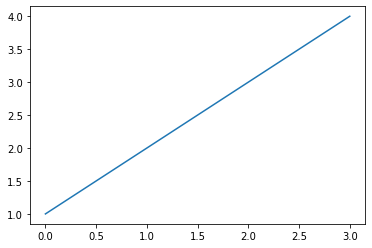

In [87]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(np.arange(1,5)) #index->x, value->y

In [88]:
test_df>0

,day1,day2
0,False,True
1,True,True
2,True,True


In [89]:
test_df[test_df>0]

,day1,day2
0,NaN,1
1,1.0,2
2,2.0,3


In [90]:
test_df[test_df>0].values

array([[nan,  1.],
       [ 1.,  2.],
       [ 2.,  3.]])

In [91]:
day_df = np.sum(test_df)
print(day_df>5)
print(day_df[day_df>5])

day1    False
day2     True
dtype: bool
day2    6
dtype: int64


In [92]:
print(day_df[day_df>5].values)

[6]
